# Задание 1

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use ('fivethirtyeight')

%config inlineBackend.figure_format = 'svg'
%matplotlib inline
from sklearn.datasets import load_boston

ModuleNotFoundError: No module named 'pandas'

In [ ]:
boston = load_boston()



c:\piprojekts\hometask\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [ ]:
# for line in boston.DESCR.split('\n'):
#     print (line)


In [ ]:
data = boston.data
price = boston.target
feature_names = boston.feature_names



Создание датафрейма

In [ ]:
x = pd.DataFrame(data,columns = feature_names)


In [ ]:
y=pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Создание тренировочных  и тестовых датафреймов.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state =42)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

Масштабирование данных

In [ ]:
from sklearn.preprocessing import StandardScaler


# sc = StandardScaler()
# x_train_scld = sc.fit_transform(x_train)
# x_test_scld =sc.transform(x_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scld = scaler.fit_transform(x_train)
x_train_scld = pd.DataFrame(x_train_scld, columns = feature_names)
x_test_scld = scaler.transform(x_test)
x_test_scld = pd.DataFrame(x_test_scld, columns = feature_names)

Построение модели TSNE

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
tsne = TSNE (n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scld)
x_train_tsne

c:\piprojekts\hometask\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 1.81041489e+01,  2.91841412e+01],
       [ 3.36446118e+00, -7.90966845e+00],
       [-2.07167511e+01, -8.94725513e+00],
       [ 2.76545868e+01,  2.66364594e+01],
       [ 4.35941935e+00, -7.43922949e+00],
       [-1.18708668e+01, -3.19696522e+00],
       [-9.88421822e+00, -3.11915612e+00],
       [-2.67814331e+01, -1.50311155e+01],
       [ 2.85059834e+01,  2.74729290e+01],
       [ 2.97867966e+01,  2.44989853e+01],
       [-1.03291616e+01, -2.70374441e+00],
       [-6.06545353e+00, -9.15262985e+00],
       [-5.61790419e+00, -1.35841761e+01],
       [ 2.86210976e+01,  2.46200790e+01],
       [-7.11505461e+00, -1.45416355e+01],
       [ 7.49843025e+00, -8.60527611e+00],
       [ 1.22831607e+00, -5.80473423e+00],
       [-2.18536625e+01, -8.58939934e+00],
       [-1.68641014e+01, -1.03258257e+01],
       [-1.86876888e+01, -6.71250486e+00],
       [ 2.41089859e+01,  2.88961773e+01],
       [-7.64432192e-01, -5.37148428e+00],
       [-1.35651073e+01, -3.63450623e+00],
       [-8.

In [ ]:
x_train_tsne.shape

(404, 2)

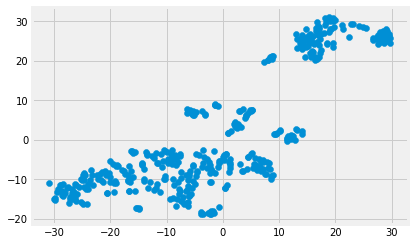

In [ ]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1])

# Задание 2

In [ ]:
from sklearn.cluster import KMeans

Разбивка данных на 3 кластера.

In [ ]:
kmeans = KMeans(n_clusters =3, random_state=42, max_iter=100 )
label_trein =kmeans.fit_predict(x_train_scld)
pd.value_counts(label_trein)

2    191
1    127
0     86
dtype: int64

Диаграмма данных TSNE

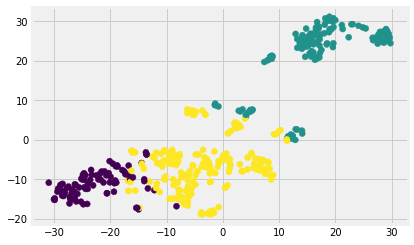

In [ ]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=label_trein)

Cредние значения  price, CRIM  по кластерам 

In [ ]:
# кластер 0
mean_price_0 = format(y_train[label_trein == 0].mean())
mean_price_0

'price    27.788372\ndtype: float64'

In [ ]:
# кластер 1
mean_price_1 = format(y_train[label_trein == 1].mean())
mean_price_1

'price    16.165354\ndtype: float64'

In [ ]:
# кластер 2
mean_price_2 = format(y_train[label_trein == 2].mean())
mean_price_2

'price    24.958115\ndtype: float64'

In [ ]:
# CRIME 0
mean_CRIME_0 = format(x_train.loc[label_trein == 0, 'CRIM'].mean())
mean_CRIME_0

'0.07356558139534884'

In [ ]:
# CRIME 1
mean_CRIME_1 = format(x_train.loc[label_trein == 1, 'CRIM'].mean())
mean_CRIME_1

'10.797028425196851'

In [ ]:
# CRIME 2
mean_CRIME_2 = format(x_train.loc[label_trein == 2, 'CRIM'].mean())
mean_CRIME_2

'0.4216602094240837'

# Задание 3

Работа модели на тестовых данных.

In [ ]:
label_test =kmeans.fit_predict(x_test_scld)
pd.value_counts(label_test)

1    53
2    35
0    14
dtype: int64

Cредние значения  price, CRIM  по кластерам   на тестовых данных.

In [ ]:

# кластер 0
mean_price_0 = format(y_test[label_test == 0].mean())
mean_price_0

'price    33.871429\ndtype: float64'

In [ ]:
# кластер 1
mean_price_1 = format(y_test[label_test == 1].mean())
mean_price_1

'price    21.55283\ndtype: float64'

In [ ]:
# кластер 2
mean_price_2 = format(y_test[label_test == 2].mean())
mean_price_2

'price    16.437143\ndtype: float64'

In [ ]:
# CRIME 0
mean_CRIME_0 = format(x_test.loc[label_test == 0, 'CRIM'].mean())
mean_CRIME_0

'0.08618571428571427'

In [ ]:
# CRIME 1
mean_CRIME_1 = format(x_test.loc[label_test == 1, 'CRIM'].mean())
mean_CRIME_1

'0.25200716981132076'

In [ ]:
# CRIME 2
mean_CRIME_2 = format(x_test.loc[label_test == 2, 'CRIM'].mean())
mean_CRIME_2

'10.165531142857143'

Окончание задания.